In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
def plot_sample(index):
    plt.figure(figsize = (10,3))
    plt.imshow(x_train[index])

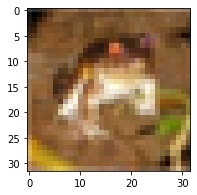

In [19]:
plot_sample(0)

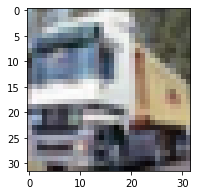

In [20]:
plot_sample(1)

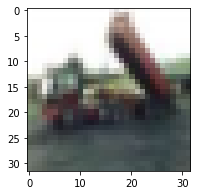

In [21]:
plot_sample(2)

In [22]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

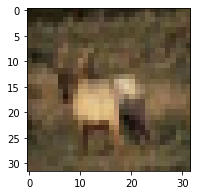

In [23]:
plot_sample(3)

In [24]:
y_train[3]

array([4], dtype=uint8)

In [26]:
classes[y_train[3][0]]

'deer'

In [29]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [30]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [31]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [33]:
y_train_categorical = keras.utils.to_categorical(
                  y_train, num_classes = 10, dtype = 'float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
y_test_categorical = keras.utils.to_categorical(
                  y_train, num_classes = 10, dtype = 'float32'
)
y_test_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 86s 55ms/step - loss: 1.9336 - accuracy: 0.3025
Epoch 2/50
1563/1563 [==============================] - 83s 53ms/step - loss: 1.6389 - accuracy: 0.4200
Epoch 3/50
1563/1563 [==============================] - 84s 54ms/step - loss: 1.5633 - accuracy: 0.4483
Epoch 4/50
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4869 - accuracy: 0.4794
Epoch 5/50
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4422 - accuracy: 0.4903
Epoch 6/50
1563/1563 [==============================] - 94s 60ms/step - loss: 1.3941 - accuracy: 0.5080
Epoch 7/50
1563/1563 [==============================] - 100s 64ms/step - loss: 1.3441 - accuracy: 0.5319
Epoch 8/50
1563/1563 [==============================] - 96s 61ms/step - loss: 1.3176 - accuracy: 0.5363
Epoch 9/50
1563/1563 [==============================] - 94s 60ms/step - loss: 1.2859 - accuracy: 0.5499
Epoch 10/50
1563/1563 [==============================] - 94s 60

In [51]:
classes[np.argmax(model.predict(x_test_scaled)[2])]

'ship'

In [52]:
classes[y_test[2][0]]

'ship'

In [56]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

### Measuring time on a CPU

In [58]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 97s 54ms/step - loss: 1.9233 - accuracy: 0.3101
1min 57s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Measure training time on a GPU

In [60]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 86s 55ms/step - loss: 1.9332 - accuracy: 0.3064
1min 27s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Run 10 epochs for CPU

In [61]:
%%timeit  -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 84s 53ms/step - loss: 1.9280 - accuracy: 0.3035
Epoch 2/10
1563/1563 [==============================] - 85s 55ms/step - loss: 1.6456 - accuracy: 0.4198
Epoch 3/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.5512 - accuracy: 0.4526
Epoch 4/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.4877 - accuracy: 0.4751
Epoch 5/10
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4265 - accuracy: 0.4992
Epoch 6/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.3849 - accuracy: 0.5172
Epoch 7/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.3485 - accuracy: 0.5271
Epoch 8/10
1563/1563 [==============================] - 93s 60ms/step - loss: 1.3177 - accuracy: 0.5382
Epoch 9/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.2761 - accuracy: 0.5513
Epoch 10/10
1563/1563 [==============================] - 87s 56m

### Run 10 epochs for GPU

In [62]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.9339 - accuracy: 0.3035
Epoch 2/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.6513 - accuracy: 0.4159
Epoch 3/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.5576 - accuracy: 0.4511
Epoch 4/10
1563/1563 [==============================] - 90s 57ms/step - loss: 1.4904 - accuracy: 0.4742
Epoch 5/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.4354 - accuracy: 0.4936
Epoch 6/10
1563/1563 [==============================] - 85s 55ms/step - loss: 1.3973 - accuracy: 0.5102
Epoch 7/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.3522 - accuracy: 0.5222
Epoch 8/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.3219 - accuracy: 0.5370
Epoch 9/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.2904 - accuracy: 0.5454
Epoch 10/10
1563/1563 [==============================] - 86s 55m